<a href="https://colab.research.google.com/github/PrachitiSParulekar/machine-learning-end-to-end-pipeline/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', as_frame=True)
data = boston.data
target = boston.target

X = data
y = target
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [4]:
X.shape

(506, 13)

In [5]:
X.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [6]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [7]:
X_single = X[['LSTAT']].copy()
X_single.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


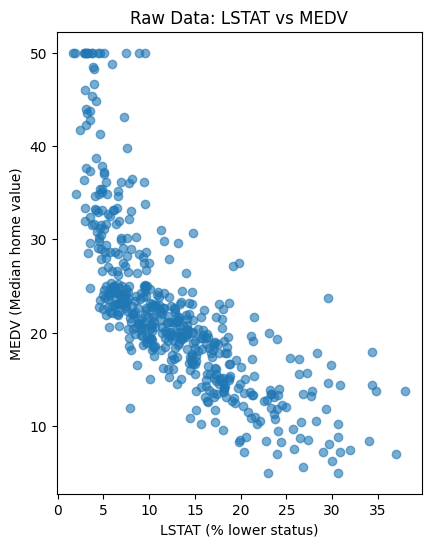

In [9]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_single['LSTAT'], y, alpha=0.6)
plt.xlabel('LSTAT (% lower status)')
plt.ylabel('MEDV (Median home value)')
plt.title('Raw Data: LSTAT vs MEDV')
plt.show()

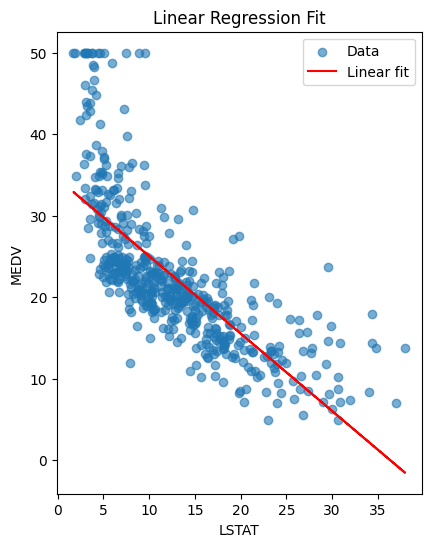

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_single, y)
y_linear = lr.predict(X_single)

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 2)
plt.scatter(X_single['LSTAT'], y, alpha=0.6, label='Data')
plt.plot(X_single['LSTAT'], y_linear, 'r-', label='Linear fit')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

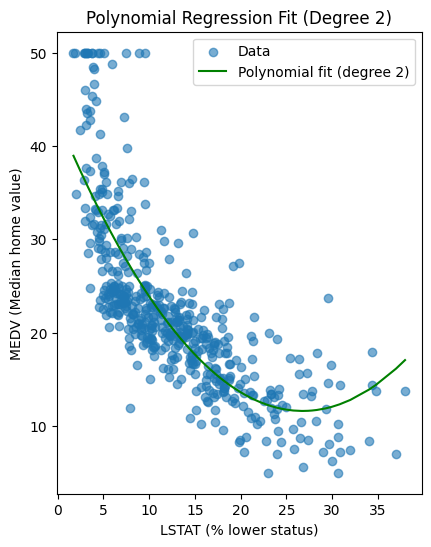

In [14]:
# Sorted data for smooth polynomial curve
X_sorted = np.sort(X_single['LSTAT'])
X_sorted_df = pd.DataFrame(X_sorted, columns=['LSTAT'])

# Create polynomial features for the sorted data
poly_degree = 2  # Example polynomial degree
poly_features = PolynomialFeatures(degree=poly_degree)
X_sorted_poly = poly_features.fit_transform(X_sorted_df)

# Fit a linear regression model to the polynomial features
poly_model = LinearRegression()
poly_model.fit(poly_features.fit_transform(X_single), y)
# Predict on the sorted polynomial features
y_poly_pred = poly_model.predict(X_sorted_poly)
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 3)
plt.scatter(X_single['LSTAT'], y, alpha=0.6, label='Data')
plt.plot(X_sorted, y_poly_pred, 'g-', label=f'Polynomial fit (degree {poly_degree})') # Plot the polynomial fit

# Add labels and legend
plt.xlabel('LSTAT (% lower status)')
plt.ylabel('MEDV (Median home value)')
plt.title(f'Polynomial Regression Fit (Degree {poly_degree})')
plt.legend()
plt.show()

In [34]:
def create_polynomial_features(X, degree):
    """Create polynomial features manually"""
    X_poly = X.copy()
    feature_names = [X.columns[0]]

    for d in range(2, degree + 1):
        col_name = f"{X.columns[0]}^{d}"
        X_poly[col_name] = X.iloc[:, 0] ** d
        feature_names.append(col_name)

    return X_poly, feature_names

# Create polynomial features for different degrees
degrees = [1, 2, 3, 4, 5, 6]
results = {}

for degree in degrees:
    if degree == 1:
        X_poly = X_single.copy()
    else:
        X_poly, feature_names = create_polynomial_features(X_single, degree)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_poly, y, test_size=0.2, random_state=42
    )

    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results[degree] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'model': model,
        'X_train': X_train,
        'X_test': X_test
    }

# Display results
results_df = pd.DataFrame(results).T
print("Polynomial Regression Results:")
print(results_df[['train_mse', 'test_mse', 'train_r2', 'test_r2']].round(3))

Polynomial Regression Results:
   train_mse   test_mse  train_r2   test_r2
1  39.760387  33.519549  0.542318  0.542918
2   31.11545  27.362831   0.64183  0.626873
3  29.807469  25.284049  0.656886   0.65522
4  28.505639  24.156203  0.671872  0.670599
5    27.8936  22.982734  0.678917  0.686601
6  27.847356   22.77639  0.679449  0.689415


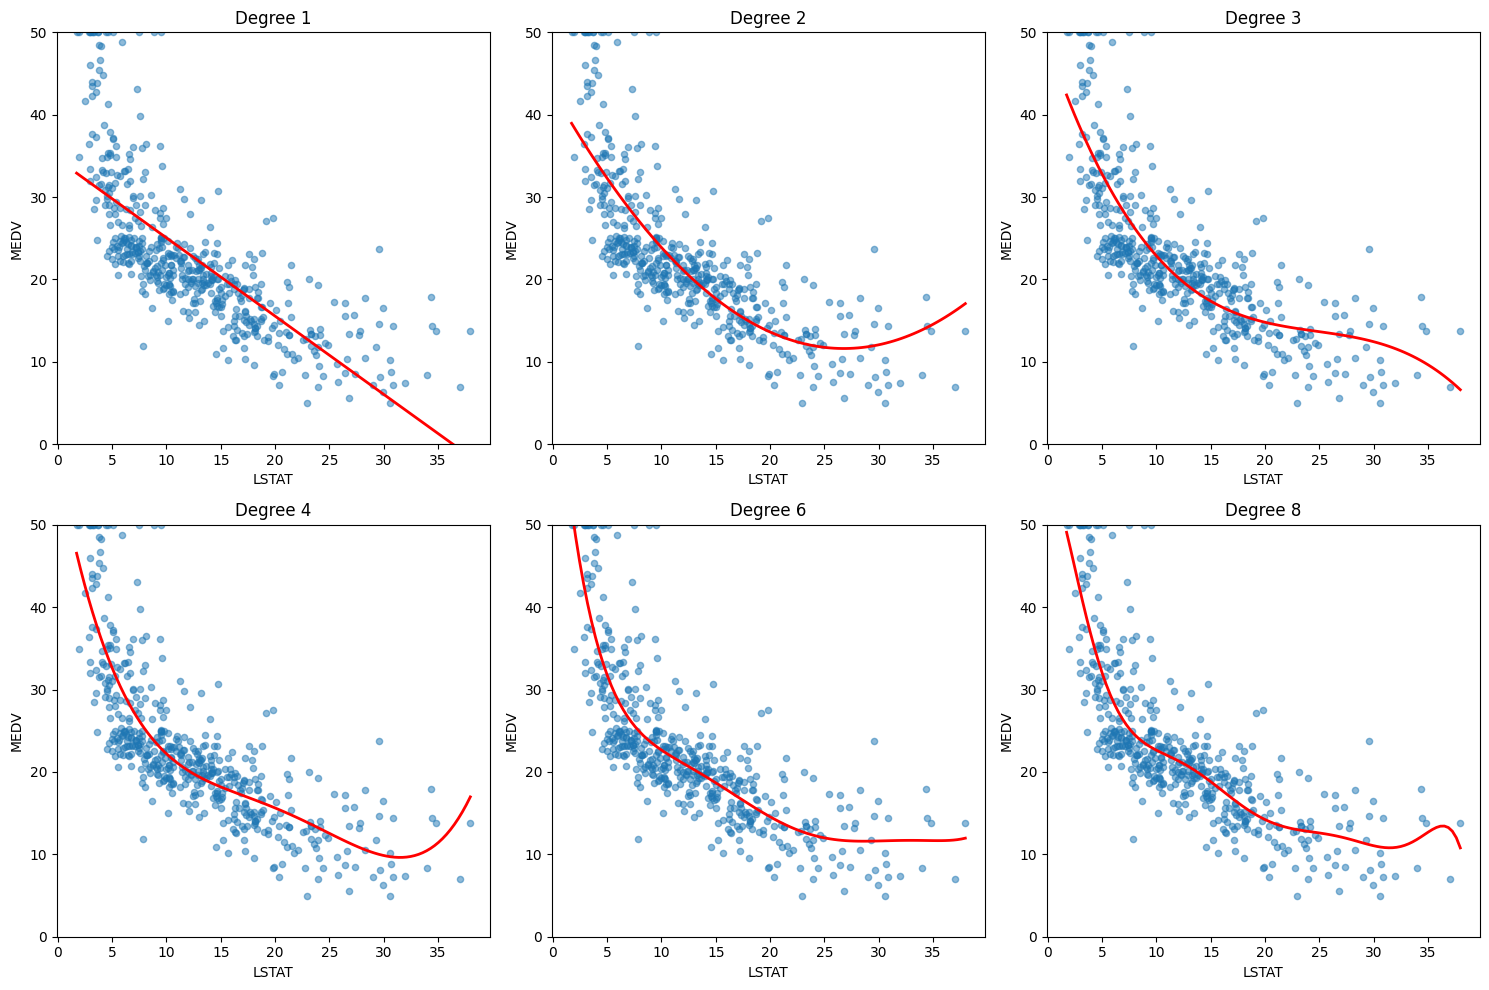

In [35]:
plt.figure(figsize=(15, 10))

for i, degree in enumerate([1, 2, 3, 4, 6, 8]):
    plt.subplot(2, 3, i+1)

    # Get data
    if degree == 1:
        X_poly = X_single.copy()
    else:
        X_poly, _ = create_polynomial_features(X_single, degree)

    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Create smooth curve for plotting
    X_plot = np.linspace(X_single['LSTAT'].min(), X_single['LSTAT'].max(), 100)
    X_plot_df = pd.DataFrame(X_plot, columns=['LSTAT'])

    if degree > 1:
        X_plot_poly, _ = create_polynomial_features(X_plot_df, degree)
    else:
        X_plot_poly = X_plot_df

    y_plot_pred = model.predict(X_plot_poly)

    # Plot
    plt.scatter(X_single['LSTAT'], y, alpha=0.5, s=20)
    plt.plot(X_plot, y_plot_pred, 'r-', linewidth=2)
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')
    plt.title(f'Degree {degree}')
    plt.ylim(0, 50)

plt.tight_layout()
plt.show()

Step 5: Feature Scaling and Its Impact

In [36]:
# Compare with and without feature scaling
def compare_scaling(X, y, degree):
    """Compare polynomial regression with and without scaling"""

    # Without scaling
    X_poly, _ = create_polynomial_features(X, degree)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    model_unscaled = LinearRegression()
    model_unscaled.fit(X_train, y_train)
    test_mse_unscaled = mean_squared_error(y_test, model_unscaled.predict(X_test))

    # With scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model_scaled = LinearRegression()
    model_scaled.fit(X_train_scaled, y_train)
    test_mse_scaled = mean_squared_error(y_test, model_scaled.predict(X_test_scaled))

    return {
        'unscaled_mse': test_mse_unscaled,
        'scaled_mse': test_mse_scaled,
        'coeffs_unscaled': model_unscaled.coef_,
        'coeffs_scaled': model_scaled.coef_
    }

# Test scaling impact
scaling_results = {}
for degree in [3, 5, 7]:
    scaling_results[degree] = compare_scaling(X_single, y, degree)

print("Impact of Feature Scaling:")
for degree, result in scaling_results.items():
    print(f"Degree {degree}:")
    print(f"  Without scaling MSE: {result['unscaled_mse']:.3f}")
    print(f"  With scaling MSE: {result['scaled_mse']:.3f}")
    print(f"  Coefficient magnitude (unscaled): {np.max(np.abs(result['coeffs_unscaled'])):.2e}")
    print(f"  Coefficient magnitude (scaled): {np.max(np.abs(result['coeffs_scaled'])):.2e}")
    print()

Impact of Feature Scaling:
Degree 3:
  Without scaling MSE: 25.284
  With scaling MSE: 25.284
  Coefficient magnitude (unscaled): 3.89e+00
  Coefficient magnitude (scaled): 3.45e+01

Degree 5:
  Without scaling MSE: 22.983
  With scaling MSE: 22.983
  Coefficient magnitude (unscaled): 1.14e+01
  Coefficient magnitude (scaled): 4.49e+02

Degree 7:
  Without scaling MSE: 23.310
  With scaling MSE: 23.310
  Coefficient magnitude (unscaled): 7.92e+00
  Coefficient magnitude (scaled): 3.03e+03



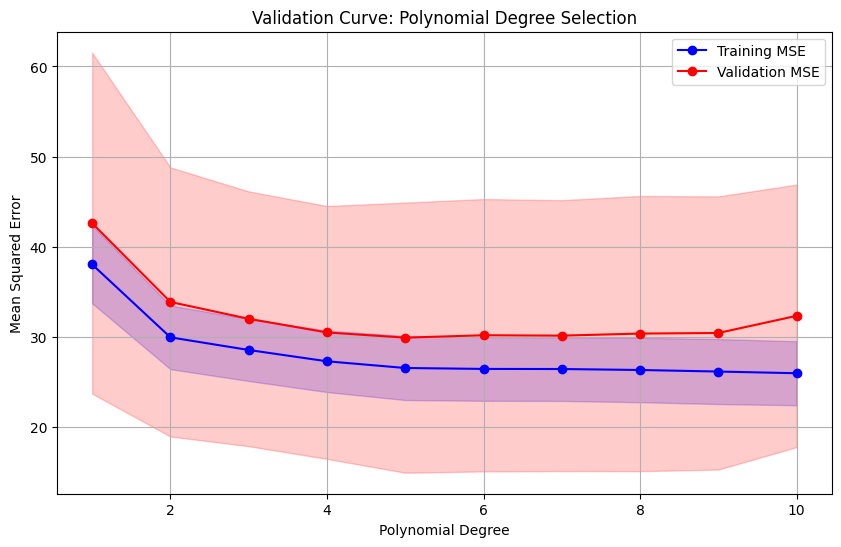

Optimal degree based on cross-validation: 5


In [37]:
from sklearn.model_selection import validation_curve

# Use sklearn's PolynomialFeatures for convenience
degrees = range(1, 11)

train_scores, val_scores = validation_curve(
    Pipeline([
        ('poly', PolynomialFeatures()),
        ('scaler', StandardScaler()),
        ('linear', LinearRegression())
    ]),
    X_single, y,
    param_name='poly__degree',
    param_range=degrees,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Convert to positive MSE
train_mse_mean = -train_scores.mean(axis=1)
train_mse_std = train_scores.std(axis=1)
val_mse_mean = -val_scores.mean(axis=1)
val_mse_std = val_scores.std(axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse_mean, 'o-', color='blue', label='Training MSE')
plt.fill_between(degrees, train_mse_mean - train_mse_std, train_mse_mean + train_mse_std, alpha=0.2, color='blue')

plt.plot(degrees, val_mse_mean, 'o-', color='red', label='Validation MSE')
plt.fill_between(degrees, val_mse_mean - val_mse_std, val_mse_mean + val_mse_std, alpha=0.2, color='red')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve: Polynomial Degree Selection')
plt.legend()
plt.grid(True)
plt.show()

optimal_degree = degrees[np.argmin(val_mse_mean)]
print(f"Optimal degree based on cross-validation: {optimal_degree}")

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X_poly):
    """Calculate VIF for polynomial features"""
    vif = pd.DataFrame()
    vif["features"] = X_poly.columns
    vif["VIF"] = [variance_inflation_factor(X_poly.values, i) for i in range(X_poly.shape[1])]
    return vif

# Calculate VIF for different degrees
print("Variance Inflation Factor (VIF) Analysis:")
for degree in [2, 3, 4, 5]:
    X_poly, feature_names = create_polynomial_features(X_single, degree)
    vif_df = calculate_vif(X_poly)
    print(f"\nDegree {degree}:")
    print(vif_df)

Variance Inflation Factor (VIF) Analysis:

Degree 2:
  features       VIF
0    LSTAT  7.656045
1  LSTAT^2  7.656045

Degree 3:
  features         VIF
0    LSTAT   38.315675
1  LSTAT^2  183.310478
2  LSTAT^3   70.462774

Degree 4:
  features          VIF
0    LSTAT   140.146692
1  LSTAT^2  1808.297508
2  LSTAT^3  3329.619472
3  LSTAT^4   728.394206

Degree 5:
  features           VIF
0    LSTAT    484.036609
1  LSTAT^2  13487.119143
2  LSTAT^3  66013.355180
3  LSTAT^4  67039.790353
4  LSTAT^5   9431.927569


In [39]:
# Compare Ridge, Lasso, and ElasticNet with polynomial features
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

def compare_regularization(X, y, degree=4):
    """Compare different regularization techniques"""

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    scaler = StandardScaler()

    X_poly = poly.fit_transform(X)
    X_poly_scaled = scaler.fit_transform(X_poly)

    X_train, X_test, y_train, y_test = train_test_split(
        X_poly_scaled, y, test_size=0.2, random_state=42
    )

    models = {
        'Linear': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Count non-zero coefficients
        if hasattr(model, 'coef_'):
            non_zero_coefs = np.sum(np.abs(model.coef_) > 1e-6)
        else:
            non_zero_coefs = len(model.coef_)

        results[name] = {
            'MSE': mse,
            'R2': r2,
            'Non-zero coeffs': non_zero_coefs
        }

    return pd.DataFrame(results).T

regularization_results = compare_regularization(X_single, y, degree=6)
print("Regularization Comparison (Degree 6):")
print(regularization_results.round(3))

Regularization Comparison (Degree 6):
               MSE     R2  Non-zero coeffs
Linear      22.776  0.689              6.0
Ridge       26.250  0.642              6.0
Lasso       28.171  0.616              2.0
ElasticNet  29.210  0.602              6.0


In [40]:
# Use multiple features with polynomial combinations
from itertools import combinations_with_replacement

# Select a few key features
key_features = ['LSTAT', 'RM', 'DIS']  # % lower status, avg rooms, distance to employment
X_multi = X[key_features].copy()

# Create polynomial features with interactions
poly_multi = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_multi_poly = poly_multi.fit_transform(X_multi)
feature_names = poly_multi.get_feature_names_out(key_features)

print(f"Original features: {X_multi.shape[1]}")
print(f"Polynomial features (degree 2): {X_multi_poly.shape[1]}")
print("Feature names:", feature_names[:10], "...")

# Compare performance
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)
X_train_poly, X_test_poly, _, _ = train_test_split(X_multi_poly, y, test_size=0.2, random_state=42)

# Scale features
scaler_linear = StandardScaler()
scaler_poly = StandardScaler()

X_train_scaled = scaler_linear.fit_transform(X_train)
X_test_scaled = scaler_linear.transform(X_test)

X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

# Fit models
model_linear = LinearRegression()
model_poly = Ridge(alpha=1.0)  # Use Ridge for stability

model_linear.fit(X_train_scaled, y_train)
model_poly.fit(X_train_poly_scaled, y_train)

# Compare results
y_pred_linear = model_linear.predict(X_test_scaled)
y_pred_poly = model_poly.predict(X_test_poly_scaled)

print("\nMultiple Features Comparison:")
print(f"Linear Regression - MSE: {mean_squared_error(y_test, y_pred_linear):.3f}, R²: {r2_score(y_test, y_pred_linear):.3f}")
print(f"Polynomial (Ridge) - MSE: {mean_squared_error(y_test, y_pred_poly):.3f}, R²: {r2_score(y_test, y_pred_poly):.3f}")

Original features: 3
Polynomial features (degree 2): 9
Feature names: ['LSTAT' 'RM' 'DIS' 'LSTAT^2' 'LSTAT RM' 'LSTAT DIS' 'RM^2' 'RM DIS'
 'DIS^2'] ...

Multiple Features Comparison:
Linear Regression - MSE: 31.266, R²: 0.574
Polynomial (Ridge) - MSE: 16.903, R²: 0.770


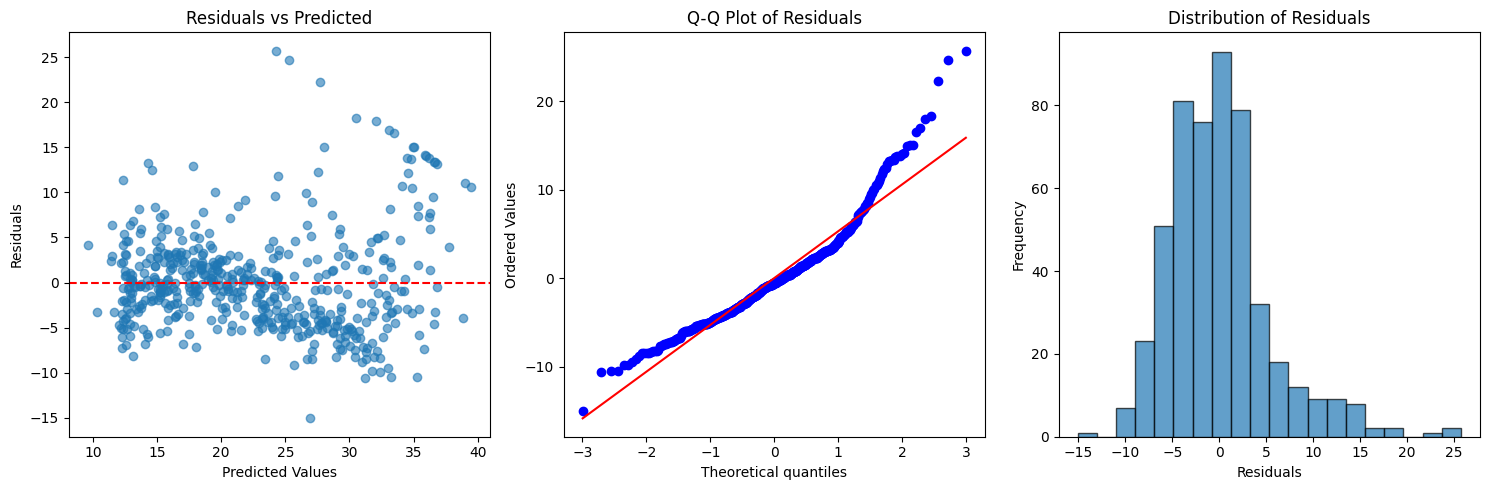

Final Model Performance:
MSE: 29.752
MAE: 4.010
R²: 0.648


In [41]:
# Use optimal degree with regularization
best_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=optimal_degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

best_pipeline.fit(X_single, y)
y_pred_final = best_pipeline.predict(X_single)

# Residual analysis
residuals = y - y_pred_final

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_pred_final, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(1, 3, 2)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.subplot(1, 3, 3)
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Final model performance
print("Final Model Performance:")
print(f"MSE: {mean_squared_error(y, y_pred_final):.3f}")
print(f"MAE: {mean_absolute_error(y, y_pred_final):.3f}")
print(f"R²: {r2_score(y, y_pred_final):.3f}")